In [11]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os
import shutil
import seaborn


In [ ]:
# Create the directory if it doesn't exist
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Move the file from your current folder to ~/.kaggle
shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Secure it (Kaggle requires this)
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

In [12]:
#import dataset
import kagglehub

#Downlaod latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jyang\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1


In [13]:
#read in files
train_dr = path + "\Training"
test_dr = path + "\Testing"

In [14]:
def get_data_labels(directory):
    paths = []
    labels = []
    for label_name in os.listdir(directory):
        class_dir = os.path.join(directory, label_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                file_path = os.path.join(class_dir, filename)
                paths.append(file_path)
                labels.append(label_name)
    return paths, labels

#get data from files
train_paths, train_labels = get_data_labels(train_dr)
test_paths, test_labels = get_data_labels(test_dr)

#print information
print(train_dr)
print('Training Info:')
print(f'Number of Paths: {len(train_paths)}')
print(f'Number of Labels: {len(train_labels)}')
print(test_dr)
print('Testing Info:')
print(f'Number of Paths: {len(test_paths)}')
print(f'Number of Labels: {len(test_labels)}')

C:\Users\jyang\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Training
Training Info:
Number of Paths: 5712
Number of Labels: 5712
C:\Users\jyang\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Testing
Testing Info:
Number of Paths: 1311
Number of Labels: 1311


In [15]:
#load train data
def train_df():
    classes, class_paths = zip(*[(label, os.path.join(train_dr, label, image))
                                 for label in os.listdir(train_dr) if os.path.isdir(os.path.join(train_dr, label))
                                 for image in os.listdir(os.path.join(train_dr, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [16]:
#load test data
def test_df():
    classes, class_paths = zip(*[(label, os.path.join(test_dr, label, image))
                                 for label in os.listdir(test_dr) if os.path.isdir(os.path.join(test_dr, label))
                                 for image in os.listdir(os.path.join(test_dr, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [17]:
train_df()

,Class Path,Class
0,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
1,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
2,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
3,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
4,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
...,...,...
5707,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary
5708,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary
5709,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary
5710,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary


In [ ]:
test_df()

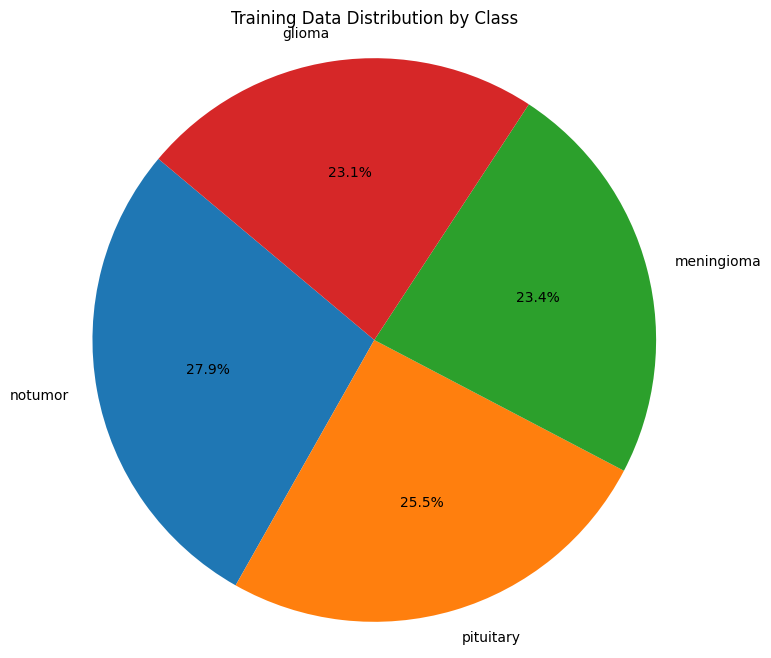

In [ ]:
#Visualize Training Data Distribution of Training Data
df = train_df() # call function to get dataframe
class_counts = df['Class'].value_counts()

#Create Viusal Distribution of Data (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Training Data Distribution by Class')
plt.axis('equal')
plt.show()

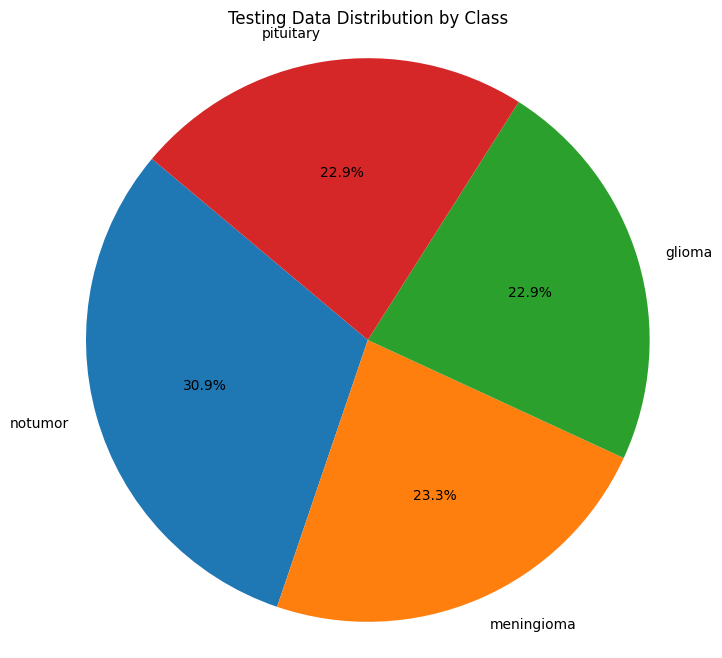

In [22]:
#Visualize Training Data Distribution of Testing Data
df = test_df() # call function to get dataframe
class_counts = df['Class'].value_counts()

#Create Viusal Distribution of Data (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Testing Data Distribution by Class')
plt.axis('equal')
plt.show()